In [2]:
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from scipy import stats
import pandas as pd
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from IPython.display import display, Math, Latex
from sympy.abc import x
from sympy import Poly
from sympy.solvers.inequalities import solve_rational_inequalities
%matplotlib inline

# Assignment 1

A company claims that the amount of coffee from their coffee machine is normal distributed around 250 gram, with a standard deviation of 2.5 gram. 

In [4]:
#A buyer try the machine 25 times, and gets the following results 

X= np.array([252.0 , 253.0 , 249.0 , 248.1, 251.7, 245.5, 249.6, 250.4, 252.5, 250.6,
             249.7, 248.2, 249.5, 247.6, 253.5, 247.6, 248.5, 252.3, 253.7, 255.7, 258.1, 252.9, 251.8, 252.3, 253.6])
 

[245.5 247.6 248.1 248.2 248.5 249.  249.5 249.6 249.7 250.4 250.6 251.7
 251.8 252.  252.3 252.5 252.9 253.  253.5 253.6 253.7 255.7 258.1] [1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]


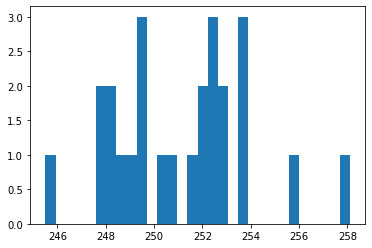

In [5]:
unique, counts = np.unique(X, return_counts=True) 
print(unique, counts)
plt.hist(X, bins=30);

In [9]:
# 1. What is the sample mean? 
X.mean()

In [10]:
#2. What is the sample Variance? 
variance = np.sum((X-X.mean())**2)/(25-1)
print("The sample variance is = " , variance) 
print("The sample variance is = " ,X.var(ddof=1)) 

The sample variance is =  8.092900000000018
The sample variance is =  8.092900000000018


In [11]:
#3. What is the sample standard deviation?
stdev = sqrt(variance)
stdev

In [12]:
#4. What is the P-value (2-tailed)? 
#This is the formula to do it without calculate z value:
prob = norm.cdf(X.mean(), loc=250, scale=2.5/np.sqrt(len(X))) 
p_val = 2*min(prob, 1-prob) 
print('p_value = ', p_val) # p_value =  0.0283795

p_value =  0.028379506632798757


In [13]:
#Calculating z value first, you can use it to ckeck.
z = (X.mean()-250) / ((2.5)/sqrt(25))
prob = norm.cdf(z)
p_val = 2*min(prob, 1-prob) 
p_val

In [14]:
#5. Can the buyer reject that it is correctly calibrated with significant level α, of 5% ? 

#yes as P_value is less than the significanse level 5% . To accept, the P-value needs to be bigger than alfa (0.05 in this case)

After rejecting the hypothesis that the coffee machine is correctly calibrated, the buyer confronts the company. The company argues that it is correctly calibrated, but admits that they don’t know the true standard deviation. 

In [15]:
#6) What is the P-value (2-tailed) when the variance is unknown? 
#Use this when variance/standart deviation is unknown
prob = stats.t.cdf(X.mean(), df=len(X)-1, loc=250, scale=X.std(ddof=1)/np.sqrt(len(X))) 
p_val = 2*min(prob, 1-prob) 
print('p_value = ', p_val) #p_value =  0.06598787 

p_value =  0.06598787079213086


In [16]:
#same thing but with formula t value (sample mean - mean) / (sample std/sqrt(number of samples))
t_value = (X.mean() - 250)/(stdev/sqrt(25))
t_value 
prop = stats.t.cdf(t_value,24)
P_val=2*min(prop,1-prop)
print('P_value = ', P_val*100, ' %')

P_value =  6.5987870792130865  %


In [25]:
# 7)Can the buyer reject that it is correctly calibrated with significant level α, of 5% ? 
#No, because the P value (0.065) is bigger than the significant livel (0.05) 

# Assignment 2

A suspicious guy is gambling and winning lots of money by flipping a coin. Heads he wins, tails he looses. He is using his own coin. 

After a 15 observation he had 11 heads.  
Make a hypothesis test, and see if you can reject it with #a significant level α, of 5%:  

In [3]:
# Hipothesis : In 15 observations we can have 11 heads

#The probability of flippling a coin and getting either head or tail is 50-50 = 50% = 0.5
#The suspicious guy is basically getting a higher probability for heads, so we test if the probability for heads can be
#give that amount of successes 

#Ho = P(Head) <= 0.5  #NULL Hypothesis: the probability of getting heads is less or equals to 50% #1 tailed test
#significance level 0.05

,Gender,Smoker,Non-smoker,Total
0,Male,72,44,116
1,Female,34,53,87
2,Total,106,97,203


In [28]:
#p= 0.5 #probability of getting head or tail
#Let X be the number of heads obtained
x= 10   #Using 10 because I want X >= 11 (Includying 11) 
#n=15 number of trials

#binom uses x, n ,p
p_val=binom.sf(k=10, n=15, p=0.5) 
print('P_value = ',p_val)

# Can also be calculated in the following way but it is more complecated for me to understand: 
p_val=binom.pmf(k=[11,12,13,14,15], n=15, p=0.5) 
print('P_value = ',sum(p_val))

P_value =  0.059234619140624986
P_value =  0.059234619140625173


In [7]:
#As the P-value > significance level we cannot reject the null-hypothesis. 

# Assignment 3

In 1981 203 exchange students were asked if they smoked. 
Determine with a chi-square Contingency table test if there is an relation between gender and smoking habits. 

In [4]:
#H0 hypothesis is that males don't smoke more than females (Somoking independent of gender)

#Calculate expected values if the null hypothesis was true (with the totals) - Done in the notebook
data = [["Male",72,44,116],["Female", 34,53,87],["Total",106,97,203]]
pd.DataFrame(data , columns=["Gender","Smoker", "Non-smoker","Total"])

,Gender,Smoker,Non-smoker,Total
0,Male,72,44,116
1,Female,34,53,87
2,Total,106,97,203


In [10]:
X2 = (72-60.57)**2/60.57+(44-55.42)**2/55.42+(34-45.42)**2/45.42+(53-41.57)**2/41.57 
X2

In [11]:
#Calculate degrees of freedom: 
# the Degrees of freedom is calculated: Dof = (rows-1)*(columns-1) 
dof = (2-1)*(2-1)  
print('Degrees of freedom = ', dof) 
print('P_value = ',stats.chi2.sf(X2, df=1))

Degrees of freedom =  1
P_value =  0.0011781674080243532


In [12]:
# can also be calculated in the following way, but I think it is more complex: 
obs = [[72,44],[34,53]] 
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(obs, correction=False) 
print('P_value = ',p_val) 

# As the P-value is smaller than the significance level (0.05), 
#    we reject the null hypothesis. Your gender is dependent of your smoking habits. 

# Assignment 4

100 Americans were asked what they voted. Create a chi-square Contingency table test on the following table: 

In [19]:
data = [["Male",26, 13,5], ["Female",20, 29,7]]  #Each row is []
pd.DataFrame(data, columns=["Gender","Trump voter", "Hillary voter", "Doesn't vote"])

,Gender,Trump voter,Hillary voter,Doesn't vote
0,Male,26,13,5
1,Female,20,29,7


In [20]:
#H0 the gender doesn't affect the vote.

In [21]:
# make the totals
data = [["Male",26,13,5,44 ],["Female", 20,29,7,56],["Total", 46 ,42,12,100]]
pd.DataFrame(data , columns=["Gender","Trump voter", "Hillary voter","Doesn't vote","Total"])

,Gender,Trump voter,Hillary voter,Doesn't vote,Total
0,Male,26,13,5,44
1,Female,20,29,7,56
2,Total,46,42,12,100


In [22]:
# make the expected values
data = [["Male",46*44/100,42*44/100,12*44/100,44 ],["Female", 46*56/100,42*56/100,12*56/100,56],["Total", 46 ,42,12,100]]
pd.DataFrame(data , columns=["Gender","Trump voter", "Hillary voter","Doesn't vote","Total"])

,Gender,Trump voter,Hillary voter,Doesn't vote,Total
0,Male,20.24,18.48,5.28,44
1,Female,25.76,23.52,6.72,56
2,Total,46.00,42.00,12.00,100


In [24]:
X2 = (26-20.24)**2/20.24+(20-25.76)**2/25.76+(13-18.48)**2/18.48+(29-23.52)**2/23.52+(5-5.28)**2/5.28+(7-6.72)**2/6.72 
print('X2 = ', X2)   

X2 =  5.855499314350248


In [27]:
# the Degrees of freedom is calculated: Dof = (rows-1)*(columns-1) 
dof = (2-1)*(3-1)  
print('Degrees of freedom = ', dof) 
print('P_value = ',stats.chi2.sf(X2, df=dof))

Degrees of freedom =  2
P_value =  0.05351733509077519


 As the P-value is bigger than the significance level (0.05), we cannot reject the null hypothesis. 
    Therefore, the person who you vote for is independent of the gender.